<a href="https://colab.research.google.com/github/zzhining/ml_basic/blob/main/lgbm_xgb_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LGBMClassifer, XGBClassifier

[붓꽃 데이터](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)의 품종을 분류하는 문제를 해결하기 위해 LGBMClassifer를 구현합니다.

### 데이터 불러오기

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 데이터분할

In [2]:
from sklearn.model_selection import train_test_split

X = iris_df.iloc[:, :4]
y = iris_df['label']

# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## XGBClassifier

In [3]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state = 42)

xgb_model.fit(X_train , y_train)
score = xgb_model.score(X_test, y_test)
print('정확도: {:.4f}'.format(score)) 

정확도: 0.9211


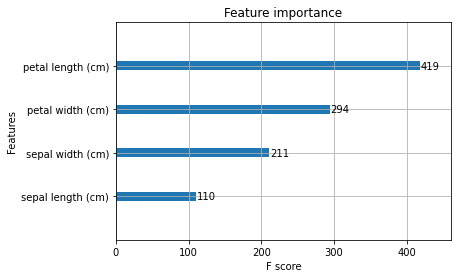

In [4]:
from xgboost import plot_importance

plot_importance(xgb_model)

In [11]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[0]	validation_0-merror:0.052632
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.052632
[2]	validation_0-merror:0.052632
[3]	validation_0-merror:0.052632
[4]	validation_0-merror:0.052632
[5]	validation_0-merror:0.052632
[6]	validation_0-merror:0.052632
[7]	validation_0-merror:0.052632
[8]	validation_0-merror:0.052632
[9]	validation_0-merror:0.052632
[10]	validation_0-merror:0.052632
Stopping. Best iteration:
[0]	validation_0-merror:0.052632



XGBClassifier(n_estimators=300, objective='multi:softprob', random_state=42)

## LGBMClassifier

In [6]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(n_estimators=300, random_state = 42)

lgb_model.fit(X_train , y_train)
score = lgb_model.score(X_test, y_test)
print('정확도: {:.4f}'.format(score)) 

정확도: 0.8947


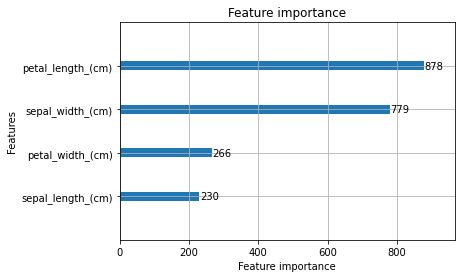

In [7]:
from lightgbm import plot_importance

plot_importance(lgb_model)

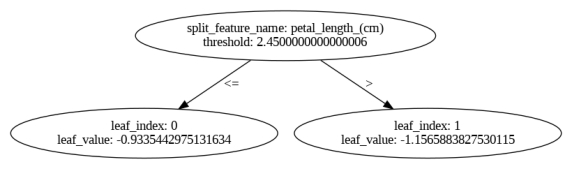

In [8]:
from lightgbm import plot_tree
plot_tree(lgb_model, figsize= (10, 10))

#### early stop

In [9]:
lgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])
score = lgb_model.score(X_test, y_test)
print('LGBMClassifier EarlyStopping 정확도: {0:.4f}'.format(score))

[1]	valid_0's multi_logloss: 0.978286
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 0.880421
[3]	valid_0's multi_logloss: 0.796846
[4]	valid_0's multi_logloss: 0.72486
[5]	valid_0's multi_logloss: 0.663865
[6]	valid_0's multi_logloss: 0.610667
[7]	valid_0's multi_logloss: 0.564415
[8]	valid_0's multi_logloss: 0.521761
[9]	valid_0's multi_logloss: 0.483989
[10]	valid_0's multi_logloss: 0.450948
[11]	valid_0's multi_logloss: 0.422582
[12]	valid_0's multi_logloss: 0.39652
[13]	valid_0's multi_logloss: 0.373639
[14]	valid_0's multi_logloss: 0.352654
[15]	valid_0's multi_logloss: 0.334728
[16]	valid_0's multi_logloss: 0.318677
[17]	valid_0's multi_logloss: 0.304595
[18]	valid_0's multi_logloss: 0.292363
[19]	valid_0's multi_logloss: 0.28144
[20]	valid_0's multi_logloss: 0.274183
[21]	valid_0's multi_logloss: 0.265917
[22]	valid_0's multi_logloss: 0.25878
[23]	valid_0's multi_logloss: 0.252651
[24]	valid_0's multi_logloss: 0.248228
[25]	valid_0's m